In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
 
 # 데이터셋 라이브러리 로드
from sklearn.datasets import load_iris
# 의사결정나무 라이브러리 로드
from sklearn.tree import DecisionTreeClassifier
# 데이터 분리 라이브러리 로드
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
# 정확도 예측 라이브러리 로드
from sklearn.metrics import accuracy_score

In [21]:
# 데이터셋 로드
iris = load_iris()

In [22]:
# target
iris_label = iris.target

# features
iris_features = iris.data

In [23]:
# 데이터 확인
df = pd.DataFrame(iris_features, columns=iris.feature_names)
df['label'] = iris_label
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# DecisionTreeClassifier 모델 구축
dt_clf = DecisionTreeClassifier(random_state=22)

# 교차검증

In [5]:
# 데이터셋을 트레인 데이터와 테스트 데이터로 분리
# test_size는 테스트 데이터의 전체 데이터 대비 비율
# random_state는 seed 값
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_label, random_state=22, test_size=0.2)

In [7]:
# 모델 학습
dt_clf.fit(x_train, y_train)

# 모델 예측
pred = dt_clf.predict(x_test)

In [8]:
# 모델 정확도 측정
print("DecisionTreeClassifier의 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

DecisionTreeClassifier의 정화도 : 0.9000


# KFold 교차검증 방법

파쳐 값을 기준으로 데이터를 나눠서 검증을 해줌

따라서 일반적으로 회귀문제에서 사용됨

In [36]:
df_cif_oof = np.zeros_like(iris_label)
n_iter = 0
kFold = KFold(n_splits=5)

for train_index, test_index in kFold.split(iris_features):
  x_train, x_test = iris_features[train_index], iris_features[test_index]
  y_train, y_test = iris_label[train_index], iris_label[test_index]

  dt_clf.fit(x_train, y_train)
  pred = dt_clf.predict(x_test)
  n_iter += 1

  # 모델 정확도 측정
  print("{0}번째 DecisionTreeClassifier의 정확도 : {1:.3f}, 학습 데이터의 크기: {2}, 검증데이터의 크기: {3}".format(n_iter ,accuracy_score(y_test, pred), x_train.shape[0], x_test.shape[0]))
  print("{0}번째 검증 세트의 라벨: {1}".format(n_iter, y_test))

  df_cif_oof[test_index] = pred

# 모델 정확도 측정
print("DecisionTreeClassifier의 정확도 : {0:.4f}".format(accuracy_score(iris_label, df_cif_oof)))

1번째 DecisionTreeClassifier의 정확도 : 1.000, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
1번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2번째 DecisionTreeClassifier의 정확도 : 0.967, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
2번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
3번째 DecisionTreeClassifier의 정확도 : 0.900, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
3번째 검증 세트의 라벨: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
4번째 DecisionTreeClassifier의 정확도 : 0.933, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
4번째 검증 세트의 라벨: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
5번째 DecisionTreeClassifier의 정확도 : 0.733, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
5번째 검증 세트의 라벨: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
DecisionTreeClassifier의 정확도 : 0.9067


# Stratified KFold 교차검증 방법

타겟 값이 불균형 할 때 최대한 비율을 맞춰서 검증을 해줌

따라서 일반적으로 분류문제에서 사용됨

In [35]:
df_cif_oof = np.zeros_like(iris_label)
n_iter = 0
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(iris_features, iris_label):
  x_train, x_test = iris_features[train_index], iris_features[test_index]
  y_train, y_test = iris_label[train_index], iris_label[test_index]

  dt_clf.fit(x_train, y_train)
  pred = dt_clf.predict(x_test)
  n_iter += 1

  # 모델 정확도 측정
  print("{0}번째 DecisionTreeClassifier의 정확도 : {1:.3f}, 학습 데이터의 크기: {2}, 검증데이터의 크기: {3}".format(n_iter ,accuracy_score(y_test, pred), x_train.shape[0], x_test.shape[0]))
  print("{0}번째 검증 세트의 라벨: {1}".format(n_iter, y_test))

  df_cif_oof[test_index] = pred

# 모델 정확도 측정
print("DecisionTreeClassifier의 정확도 : {0:.4f}".format(accuracy_score(iris_label, df_cif_oof)))

1번째 DecisionTreeClassifier의 정확도 : 0.967, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
1번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
2번째 DecisionTreeClassifier의 정확도 : 0.967, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
2번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
3번째 DecisionTreeClassifier의 정확도 : 0.900, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
3번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
4번째 DecisionTreeClassifier의 정확도 : 0.933, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
4번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
5번째 DecisionTreeClassifier의 정확도 : 1.000, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
5번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
DecisionTreeClassifier의 정확도 : 0.9533


# feature 중요도 출력

<BarContainer object of 4 artists>

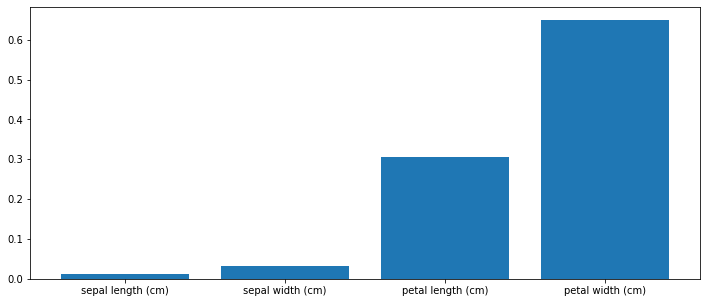

In [37]:
# 모델에서 중요하게 여기는 feature를 출력
plt.figure(figsize=(12,5))
plt.bar(x=iris.feature_names, height=dt_clf.feature_importances_)